# 대회소개 및 목적

<p align="center"><img src="https://ir.nhqv.com/img/sub/intro_ci.png"/></p> 

이 대회는 NH투자증권에서 개최하는 **"제2회 NH투자증권 빅데이터 경진대회 - 데이터 문화가 되다"** 입니다.  

NH투자증권에서 제공하는 5가지의 데이터셋을 토대로 고객들의 주식 보유기간을 예측하고 이를 활용한 서비스 아이디어를 제안하는 것이 대회의 목적입니다.  

예선, 본선, 결선을 통해 진행되며 예선을 통과한 50팀에서 16팀을 선발하여 결선에 진출합니다.  

2020년의 데이터를 토대로 2021년의 주식 보유기간을 예측하는 것이 목적입니다.  
따라서 대회 개최측에서는 외부 데이터를 사용하는 것을 적극 권장하고 있으며 외부 데이터 사용시 모든 2021년 데이터를 사용하지 않도록 유의하고 있습니다.


![](https://drive.google.com/uc?id=1Vh60FlQsg3uJnMf1jqP97Y1z7qk2gLsK)

고객들의 투자자산과 무브머니가 계속해서 증가하는 추세에서 증권사는 고객들의 최근 투자패턴 변화에 집중하고 있습니다.  
NH투자증권에서는 고객의 변화된 투자패턴을 이해하고 이에 특화된 서비스를 제공하기를 원합니다.

## 평가방식

이번 대회의 평가방식은 예선, 본선, 결선별로 평가방식이 구분되어집니다.

### 예선
- 데이콘에서 진행하며 아래 평가지표로 상위 50팀 선발
- 주식 보유기간 예측결과 값을 private 리더보드 평가 (80%)
- 코드 모델 개발 설명서 평가 (20%)
- 주의사항
  - 주석과 코드는 모두 UTF-8 인코딩을 사용해야함
  - 반드시 코드에 '/data', 데이터 입/출력 경로를 포함해야함
  - 개발환경, 라이브러리 버전 기재

### 본선
- 본선 진출자는 서비스 아이디어 제안서(ppt)를 반드시 제출
- 총 4가지의 평가지표로 상위 16팀 선정
  - 창의성 : 아이디어, 차별성, 참신성
  - 과정성 : 결과 도출까지의 논리성
  - 적합성 : 구현 알고리즘/결과에 대한 해석
  - 정확성(정량평가) : 알고리즘 오차 점수 - RMSE

### 결선
- 결선은 쇼케이스로 진행되며 본선 통과 16팀에서 상위 6팀을 수상 (나머지는 입선)
- 평가지표
  - A. 아이디어 실현 가능성(30%)  
    - 아이디어가 실제 실현 가능성이 있는가
    - 아이디어가 비즈니스적 임팩트를 기대할 수 있는가

  - B. 논리적 일관성(30%)
    - 아이디어 전개 과정에서 탄탄한 자료로 이어져 있는가
    - 근거 있는 자료를 제시하고 적합하게 사용되었는가

  - C. 내용의 창의성(20%)
    - 주제에 대한 독특한 아이디어와 창의적인 관점이 제시되어 있는가
    - 새로운 발상, 독특한 콘셉트 요소가 있는가

  - D. 자료의 완결성(10%)
    - 보고서가 성의 있고 짜임새 있게 구성되어 있는가
    - 참가자의 노력이 잘 드러나는가

  - E. 발표 능력(10%)
    - 발표가 자신감 있고 자연스러운가
    - Q&A에 대한 대응이 매끄럽고, 논리적으로 문제가 없는가


## 정확도 평가지표 (RMSE)
예선 및 본선에서 평가지표로 활용되는 지표는 RMSE입니다.  

### 평균 제곱근 편자 - RMSE (Root Mean Squared Error)

$$
\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{N}{(Y_{i}-\widehat{Y_{i}}})^2}{N}}
$$

- $N$ : 데이터 개수
- $Y_i$ : 보유일수 실제값
- $\widehat{Y_i}$ : 보유일수 예측값



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import platform
import missingno as msno
from matplotlib import font_manager, rc
from tqdm import tqdm_notebook, tqdm

## Settings

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
!pip install parmap

In [4]:
# font settings - local (로컬 실행시 각주제거하고 font settings - colab 주석처리)
"""
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False
"""

# font settings - colab
plt.rc('font', family='NanumBarunGothic') 

# pandas 부동소수점
pd.options.display.float_format = '{:.4f}'.format

# seaborn palette setting
palettes = sns.color_palette("Paired", 9)
sns.set_palette('muted')

# python warning ignore setting
warnings.filterwarnings('ignore')

# tqdm setting
tqdm.pandas()

# data input, output path setting
INPUT_PATH = 'drive/MyDrive/dataset/dacon/nh/data/'
OUTPUT_PATH = 'drive/MyDrive/dataset/dacon/nh/submissions/'

In [5]:
os.listdir(INPUT_PATH)

['cus_info.csv',
 'sample_submission.csv',
 'stk_hld_test.csv',
 'stk_hld_train.csv',
 'stk_bnc_hist.csv',
 'iem_info.csv']

# 데이터 로드 및 확인

In [81]:
customers = pd.read_csv(INPUT_PATH+'cus_info.csv')
stock_info = pd.read_csv(INPUT_PATH+'iem_info.csv')
stock_rem_hist = pd.read_csv(INPUT_PATH+'stk_bnc_hist.csv')
train = pd.read_csv(INPUT_PATH+'stk_hld_train.csv')
test = pd.read_csv(INPUT_PATH+'stk_hld_test.csv')

In [7]:
customers.head(3)

,act_id,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9


In [8]:
stock_info.head(3)

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99


In [9]:
stock_rem_hist.head(3)

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0000,2828000.0000,5000.0000
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0000,1390000.0000,5000.0000
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0000,2982490.0000,5000.0000


In [10]:
train.head(3)

,act_id,iem_cd,byn_dt,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5


In [11]:
test.head(3)

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0


# EDA

각각의 데이터셋 별로 다양한 컬럼들이 존재합니다.  
우선 각 데이터셋 별로 EDA를 진행하겠습니다.

## 1. 기본 정보 EDA

### 고객 정보 데이터 (cus_info.csv) - customers

2020년 7월 이전 계좌개설 및 2020년 12월 기준 국내주식 자산 100만원 이상 고객 중 10,000명 임의 추출한 데이터들입니다.  

데이터셋에 필요한 정보들을 분석하겠습니다.

In [12]:
column_str = {}

# cus_info column_str
sex = { 1: "남자", 2: "여자"}
age = { 1: "20-24세", 2: "25-29세", 3: "30-34세", 4: "35-39세", 5: "40-44세", 6: "45-49세", 7: "50-54세", 8: "55-59세", 9: "60-64세" }
invest_type = { 0: "정보제공미동의", 1: "안정형", 2: "안정추구형", 3: "위험중립형", 4: "적극투자형", 5: "공격투자형", 9: "전문투자자형"}
asset_range = { 1: "0원이상~1천만원 미만", 2: "1천만원 이상~3천만원 미만", 3: "3천만원 이상~5천만원 미만", 4: "5천만원 이상~1억원 미만", 5: "1억원 이상~3억원 미만", 6: "3억원 이상"}
major_product = { 0: "Only CMA", 2: "국내주식", 3: "해외주식", 5: "금속", 6: "국내채권", 8: "펀드", 9: "ELS or DLS", 10: "신탁_퇴직연금", 11: "RP", 12: "발행어음", 15: "신용대출"}
life_stage = { 2: "사회초년생", 3: "가족형성기(남자)", 4: "가족형성기(여자)", 5: "가족성숙기(직장인)", 6: "가족성숙기(주부)", 7: "가족성숙기(남자)", 8: "가족성숙기(여자)", 9: "은퇴기"}
grade = { 1: "탑클래스", 2: "골드", 3: "로얄", 4: "그린", 5: "블루", 9: "등급 미정의"}
duration = { 1: "6개월 미만", 2: "6개월~1년 미만", 3: "1년~3년 미만", 4: "3년~5년 미만", 5: "5년~10년 미만", 6: "10년 이상" }
major_type = { 1: "건설업", 2: "금융업", 3: "기계", 4: "방송, 통신", 5: "서비스, 오락, 문화", 6: "운송, 운수", 7: "유통", 
              8: "의료, 의약", 9: "전기, 전자", 10: "제조", 11: "철강", 12: "화학", 13: "IT", 14: "기타", 15: "혼합", 16: "비매매" }

# iem_info column_str
stock_type = { 1: "건설", 2: "금융", 3: "기계", 4: "통신", 5: "서비스", 6: "운송", 7: "유통", 
              8: "의료", 9: "전기", 10: "제조", 11: "철강", 12: "화학", 13: "IT", 14: "기타" }
market_cap_type = { 1: "대형주", 2: "중형주", 3: "소형주", 99: "기타" }
market_type = { 1: "코스피200", 2: "코스닥150", 99: "기타" }

column_str['sex_dit_cd'] = sex
column_str['cus_age_stn_cd'] = age
column_str['ivs_icn_cd'] = invest_type
column_str['cus_aet_stn_cd'] = asset_range
column_str['mrz_pdt_tp_sgm_cd'] = major_product
column_str['lsg_sgm_cd'] = life_stage
column_str['tco_cus_grd_cd'] = grade
column_str['tot_ivs_te_sgm_cd'] = duration
column_str['mrz_btp_dit_cd'] = major_type
column_str['btp_cfc_cd'] = stock_type
column_str['mkt_pr_tal_scl_tp_cd'] = market_cap_type
column_str['stk_dit_cd'] = market_type

In [82]:
# missing value change to Nan
customers['ivs_icn_cd'] = customers['ivs_icn_cd'].progress_apply(lambda x: None if x == 99 or np.isnan(x) else int(x))
customers['tco_cus_grd_cd'] = customers['tco_cus_grd_cd'].progress_apply(lambda x: None if x == 99 or np.isnan(x) else int(x))

100%|██████████| 10000/10000 [00:00<00:00, 314925.52it/s]


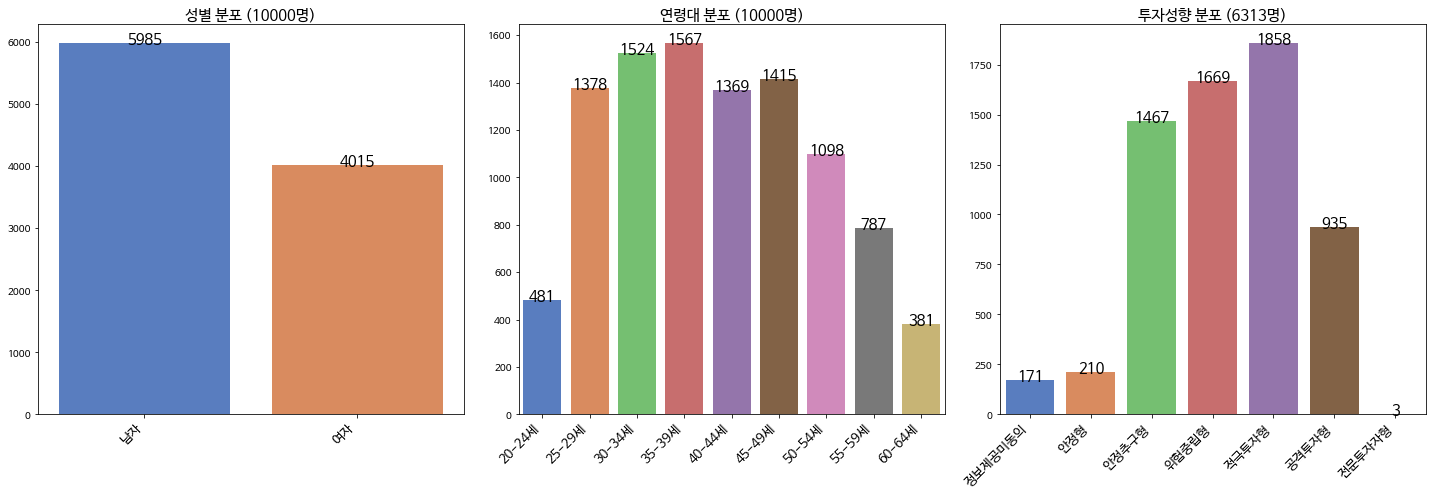

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

columns = customers.columns[1:]
col_names = ['성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Stage', '등급', '투자기간', '주거래업종']

for i, ax in zip(range(3), axes.flatten()):
  col = columns[i]
  x = sns.countplot(data=customers, x=customers[col].map(column_str[col]), ax=ax, order=column_str[col].values())

  for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height+0.1, height, ha='center', size=15)

  ax.set_xlabel('')
  ax.set_xticklabels(x.get_xticklabels(), rotation=45, fontsize=13, horizontalalignment='right')
  ax.set_ylabel('')
  ax.set_title(col_names[i]+' 분포 ('+str(len(customers)-np.isnan(customers[col]).sum())+'명)', fontsize=15)

fig.tight_layout()
plt.show()

전체 고객수는 앞서 대회 소개에 언급한 것과 같이 1만명입니다.  

- 성별 분포
  - 약 6:4비율로 남자 고객이 더 많은 것으로 확인됩니다.

- 연령대 분포
  - 고객의 연령대는 25 ~ 54세 사이의 고객이 대부분을 차지하는 것으로 보입니다.
  - 35 ~ 39세가 가장 많은 인원분포를 차지하고 있으며 30~34세, 45~49세가 뒤를 잇고 있습니다.
  - 60 ~ 64세가 가장 적은 인원분포를 차지하고 있습니다.
  - 특이한 점으로는 20대 초반 (20\~24세)에는 주식 계좌 보유자 수가 적지만 20대 중반 이후(25\~29세)부터 청년층의 주식계좌 보유자 수가 급격하게 증가하는 것을 알 수 있습니다.

- 투자성향 분포
  - 투자성향에는 결측치가 존재합니다. 결측치를 제거한 결과를 그래프에 표시하였습니다.
  - 가장 특이한 점은 투자성향에서 가장 높은 결과는 결측값입니다.  
  이에 따라 결측치를 잘 보정하는 것이 중요해보입니다.
  - 대부분의 고객이 안정추구, 위험중립, 적극투자형에 분포하고 있음을 알 수 있습니다.
  - 개인투자자가 많은 것으로 생각되는만큼 전문투자자형의 비율이 압도적으로 낮은 것을 알 수 있습니다.
  - NH투자증권 나무에서 제공하는 투자성향 구분은 다음과 같습니다.
    1. 안정형 : 초저위험
    2. 안정추구형 : 저위험
    3. 위험중립형 : 중위험
    4. 적극투자형 : 고위험
    5. 공격투자형 : 초고위험

    이에 따른 투자성 상품도 세분화되어있습니다. 후에 상황에 따라 참고하여 자료로 사용할 수 있을 것으로 보입니다.  
    [투자성향 참고표- NH 나무](https://mdev.mynamuh.com/customer/investor/investorInfo#popShare2)


posx and posy should be finite values
posx and posy should be finite values


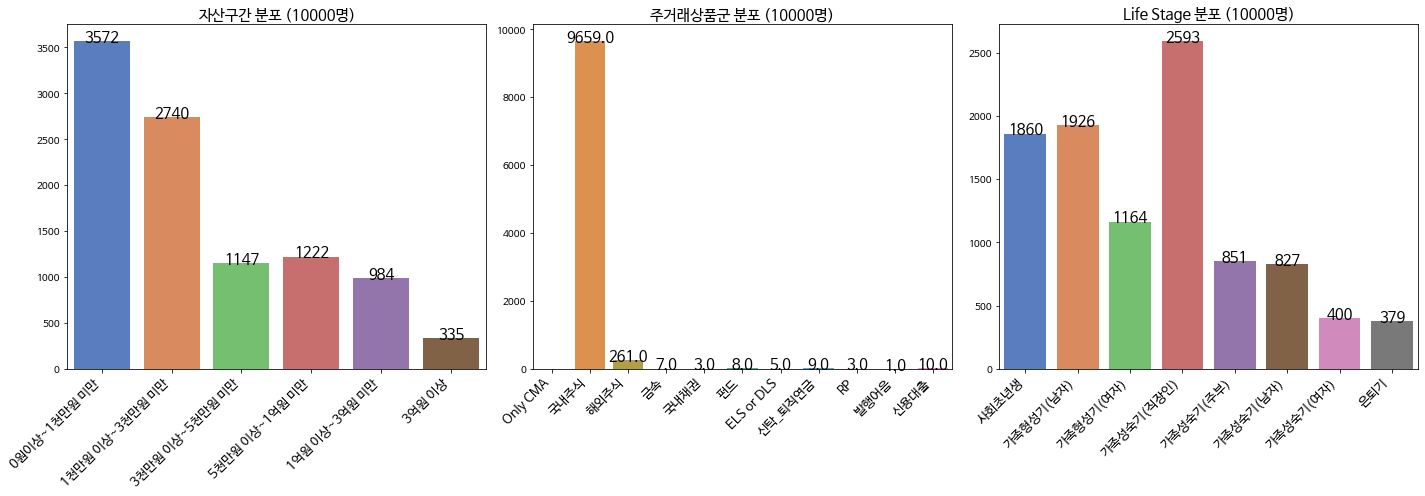

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

columns = customers.columns[1:]
col_names = ['성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Stage', '등급', '투자기간', '주거래업종']

for i, ax in zip(range(3), axes.flatten()):
  col = columns[i+3]
  x = sns.countplot(data=customers, x=customers[col].map(column_str[col]), ax=ax, order=column_str[col].values())

  for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height+0.1, height, ha='center', size=15)

  ax.set_xlabel('')
  ax.set_xticklabels(x.get_xticklabels(), rotation=45, fontsize=13, horizontalalignment='right')
  ax.set_ylabel('')
  ax.set_title(col_names[i+3]+' 분포 ('+str(len(customers) - np.isnan(customers[col]).sum())+'명)', fontsize=15)

fig.tight_layout()
plt.show()


- 자산구간 분포
  - 대부분의 고객이 0원~3천만원 정도의 자산규모를 갖고 있습니다.
  - 3억원 이상의 일명 큰손 투자자의 비율은 높지 않은 것을 알 수 있습니다.

- 주거래상품군 분포
  - 약 96% (9659명)의 고객이 국내주식을 주로 거래하고 있고 적은 수지만 해외주식을 주로 거래하는 고객도 분포하고 있습니다.
  - 국내주식+해외주식이 전체 고객의 99%를 차지하고 있습니다.

- Life Stage 분포
  - 가족성숙기(직장인)단계의 고객이 가장 많은 수를 차지하고 있습니다. 해당 단계는 남녀 구분이 이루어져있지 않기 때문에 추가적으로 성별분포를 확인할 필요가 있어보입니다.
  - 다음으로는 가족형성기(남자), 사회초년생이 뒤를 잇고 있습니다.
  


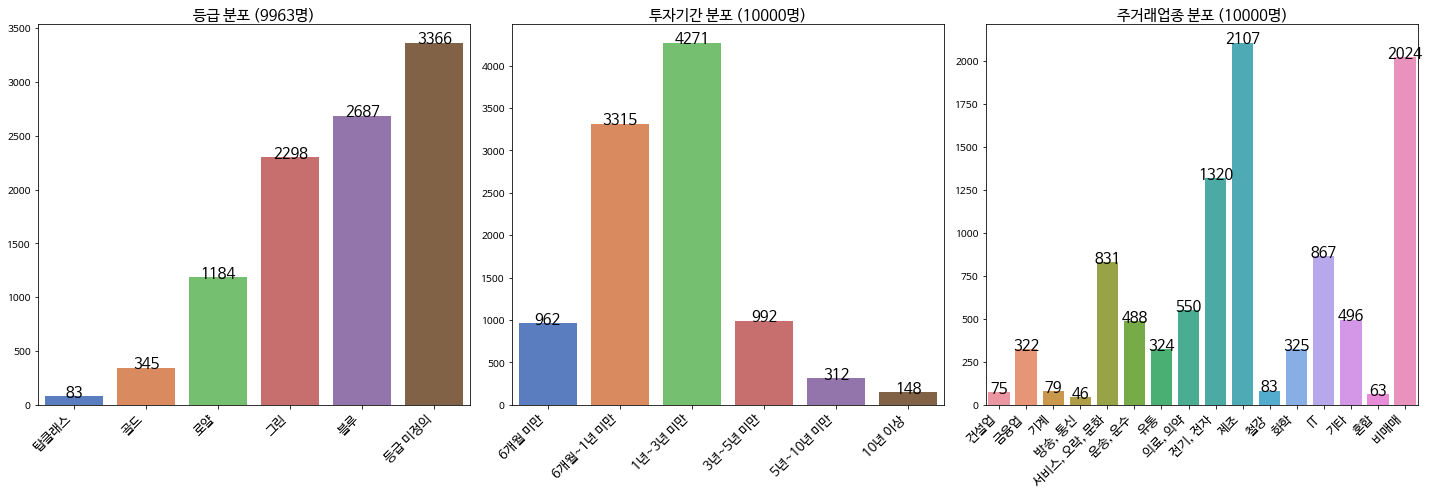

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

columns = customers.columns[1:]
col_names = ['성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Stage', '등급', '투자기간', '주거래업종']

for i, ax in zip(range(3), axes.flatten()):
  col = columns[i+6]
  x = sns.countplot(data=customers, x=customers[col].map(column_str[col]), ax=ax, order=column_str[col].values())

  for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height+0.1, height, ha='center', size=15)

  ax.set_xlabel('')
  ax.set_xticklabels(x.get_xticklabels(), rotation=45, fontsize=13, horizontalalignment='right')
  ax.set_ylabel('')
  ax.set_title(col_names[i+6]+' 분포 ('+str(len(customers)-np.isnan(customers[col]).sum())+'명)', fontsize=15)

fig.tight_layout()
plt.show()

- 등급 분포
  - 결측치가 기록된 인원은 총 37명입니다.
  - 많은 수의 고객이 등급이 정의되어있지 않습니다.  
  - 등급이 미정의된 고객을 제외하고 가장 많은 등급은 블루이고 다음으로는 그린입니다.

- 투자기간 분포
  - 많은 수의 인원이 1년~3년 미만의 기간동안 투자를 하고 있습니다.
  - 대부분의 고객이 6개월 ~ 3년 사이의 투자기간을 갖고 있습니다.
  - 1년미만은 단기, 5년미만은 중기 5년이상을 장기라 했을때 중단기 고객이 가장 많은 상황입니다.  
  이후에 필요에 따라 3개의 단계로 나눠서 분석을 할 필요도 있을 것으로 보입니다.

- 주거래업종 분포
  - 많은 수의 고객은 제조업을 주로 거래하고 있습니다.
  - 다음으로는 비매매 고객이 많습니다.
  - 2020년 기준으로 Covid-19이후 바이오 관련 업종이 강세를 보이고 있는 것을  
  참고할 가치가 있다고 판단됩니다.

### 주식종목 정보 데이터 (iem_info.csv) - stock_info

전체 기업 및 주식종목의 수는 3079개입니다.

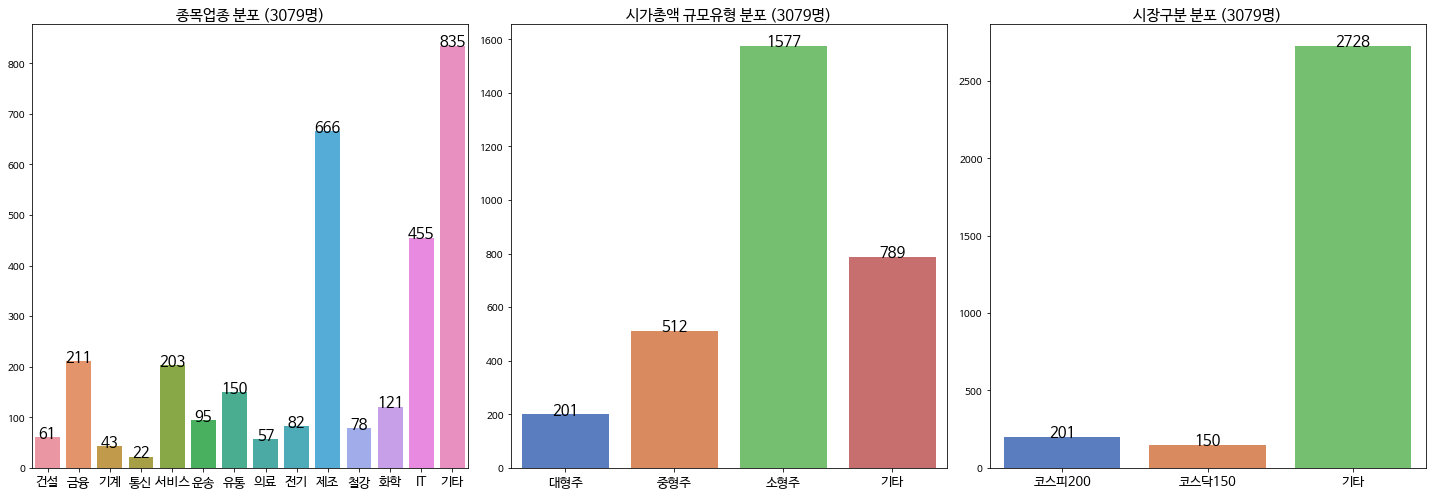

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

columns = stock_info.columns[2:]
col_names = ['종목업종', '시가총액 규모유형', '시장구분']

for i, ax in zip(range(3), axes.flatten()):
  col = columns[i]
  x = sns.countplot(data=stock_info, x=stock_info[col].map(column_str[col]), ax=ax, order=column_str[col].values())

  for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height+0.1, height, ha='center', size=15)
  
  ax.set_xlabel('')
  ax.set_xticklabels(x.get_xticklabels(), fontsize=13)
  ax.set_ylabel('')
  ax.set_title(col_names[i]+' 분포 ('+str(len(stock_info)-np.isnan(stock_info[col]).sum())+'명)', fontsize=15)

fig.tight_layout()
plt.show()

In [18]:
stock_info[stock_info['btp_cfc_cd'] == 14].head(3)

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
1,A000080,하이트진로,14,2,1
11,A001070,대한방직,14,3,99
16,A001460,BYC,14,3,99


In [19]:
stock_info[stock_info['iem_cd'] == 'A300610']

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
676,A300610,TIGER K게임,14,99,99


In [20]:
stock_info[stock_info['mkt_pr_tal_scl_tp_cd'] == 99].sample(10)

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
475,A139270,TIGER 200 금융,14,99,99
426,A108675,LX하우시스우,12,99,99
2210,A298770,KODEX 한국대만IT프리미어,14,99,99
2828,A194530,엔에스스튜디오,14,99,99
2220,A305720,KODEX 2차전지산업,14,99,99
678,A301410,ARIRANG 코스닥150선물인버스,14,99,99
755,A371460,TIGER 차이나전기차SOLACTIVE,14,99,99
128,A009900,명신산업,6,99,99
1359,A252670,KODEX 200선물인버스2X,14,99,99
1235,A139260,TIGER 200 IT,14,99,99


- 종목업종 분포
  - 종목업종은 분류를 14가지로 분류되어 있습니다. 크게 세분화하지 않은 데이터라  
  기타의 비율이 상당히 많습니다.
  - 실제로 위에 보이는 3개의 기타 업종 예시를 보면 하이트진로, 대한방직, BYC가 있습니다.  
  이때 하이트진로는 코스피에 음식료품으로 등록되어있고 대한방직과 BYC는 섬유의복으로 분류되어 있습니다.  
  이를 참고하여 업종을 재분류할 가치도 있어 보입니다.
  - 또한 기타 업종에는 'TIGER K게임'과 같은 ETF도 존재하기 때문에 업종은 더 세분화하는 분류작업을 진행해야합니다.

- 시가총액 규모유형 분포
  - 많은 수의 기업이 소형주로 분류되고 있습니다.
  - 기타로 분류된 기업들은 대부분 우선주나 ETF인 것을 알 수 있습니다.
  - 일부 '프라나랩', '퓨젠바이오'와 같은 비상장 기업도 존재하는 것을 알 수 있습니다.
  - 상황에 따라 ETF와 비상장, 우선주와 같은 세부 구분을 할 필요가 있습니다.

- 시장구분 분포
  - 코스피 200과 코스닥 150은 상위 기업들만 포함되어 있습니다.  
  하지만 많은 수의 기업이 이 외에 코스피와 코스닥에 분류되어 있으므로 기타를 재분류해야 할 필요가 있습니다.

### 학습데이터 (stk_hld_train.csv) - train

학습데이터의 주식 보유기간 분포를 확인하고자 통계수치를 확인하겠습니다.

In [21]:
tmp = pd.DataFrame()
t = train['hold_d'].value_counts()
tmp['hold_d'] = t.index
tmp['counts'] = t.values
tmp.describe()

,hold_d,counts
count,774.0000,774.0000
mean,394.1163,880.4548
std,237.2953,8029.8685
min,1.0000,1.0000
25%,194.2500,8.0000
50%,387.5000,24.0000
75%,580.7500,89.0000
max,1184.0000,190008.0000


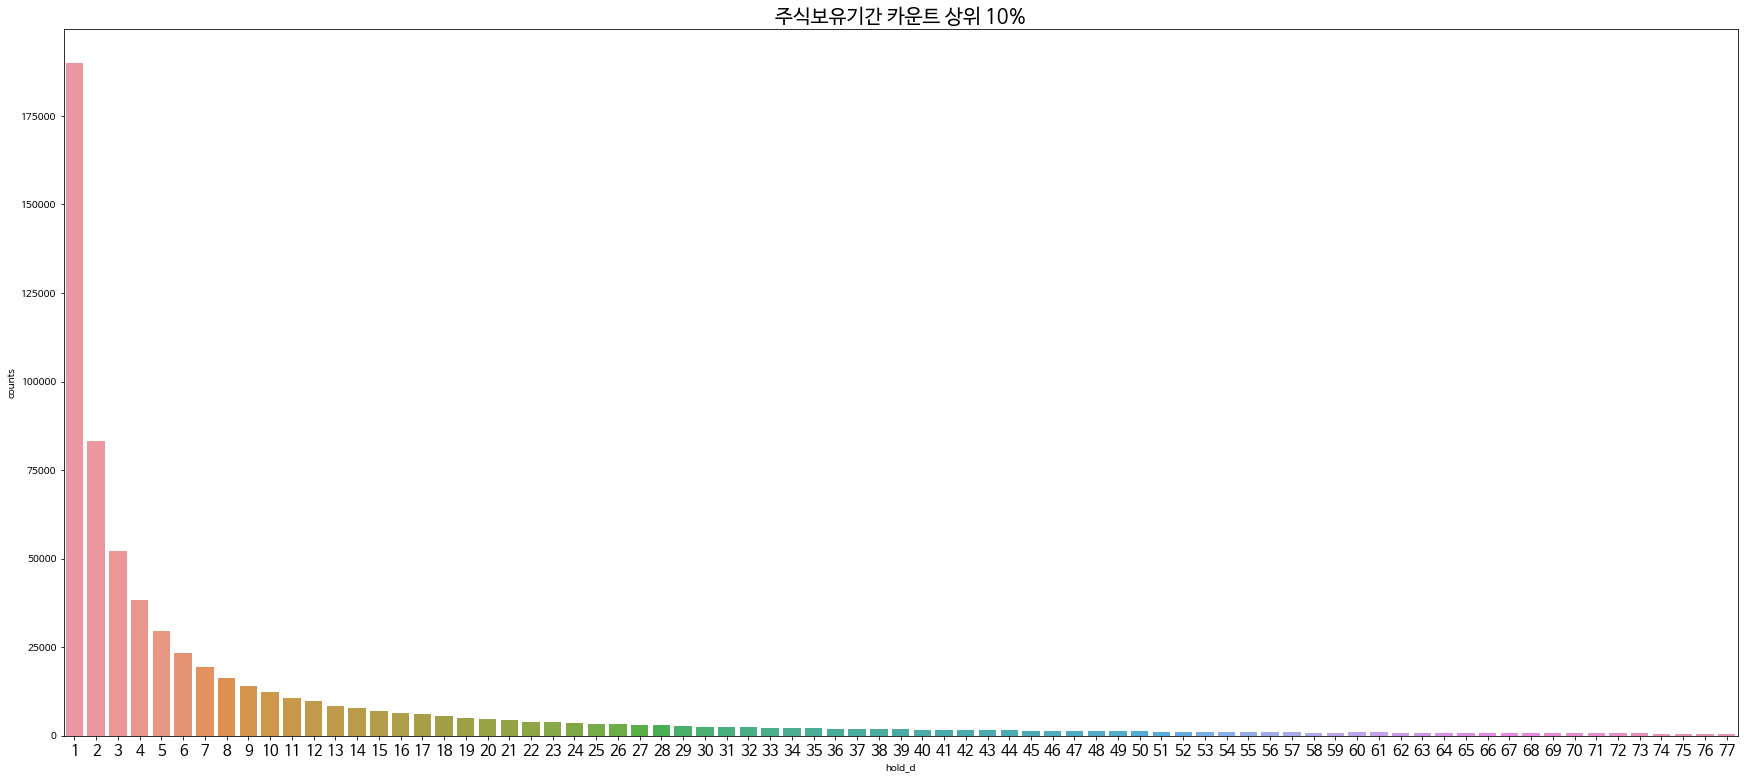

In [22]:
fig, ax = plt.subplots(figsize=(30, 13))
tmp = tmp[0:len(tmp)//10] # percentile 10
x = sns.barplot(data=tmp, x='hold_d', y='counts', ax=ax)
ax.set_title('주식보유기간 카운트 상위 10%', fontsize=20)
ax.set_xticklabels(x.get_xticklabels(), fontsize=15)
plt.show()

주식보유기간별 데이터 카운트의 상위 10% 값들을 그래프로 나타낸 것입니다.  
대부분의 주식이 1일이내의 주식 보유기간을 갖고 있으며 가장 최장기간 보유하고 있는 주식은 1184일 (약 3년 2개월)입니다.

## 2. 추가 정보 크롤링

주식종목 정보를 담고 있는 iem_info데이터에서 일부 컬럼은 재분류를 해야하는 것들이 존재했습니다.  
따라서 크롤링을 진행하겠습니다. 크롤링은 다음 증권 데이터를 사용하겠습니다.

In [23]:
from bs4 import BeautifulSoup
import requests
import re
import parmap
from multiprocessing import Pool, Manager

In [144]:
def get_market(code):
  df = pd.DataFrame()

  url = 'https://finance.daum.net/api/quotes/'+code+'?summary=false&changeStatistics=true'
  headers = {
            'Referer': 'http://finance.daum.net',
            'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36 OPR/58.0.3135.127'
            }
  
  try:
    response = requests.get(url, headers=headers)
    obj = response.json()

    name = obj['name']
    market = obj['market']
    sector_name = obj['sectorName']
    sector_code = obj['sectorCode']
    group = obj['securityGroup']

    code_list.append(code)
    market_list.append(market)
  except:
    # 비상장 기업이라 정보 없음 따로 처리
    code_list.append(code)
    market_list.append('비상장 또는 상장폐지')

### 시장구분 추가 크롤링

In [51]:
codes = stock_info.loc[(stock_info['stk_dit_cd'] == 99) | (np.isnan(stock_info['stk_dit_cd']))]['iem_cd'].values
manager = Manager()
code_list = manager.list()
market_list = manager.list()

ret = parmap.map(get_market, codes, pm_pbar=True, pm_processes=5)

2740it [07:30,  6.09it/s]


In [95]:
code_list = list(code_list)
market_list = list(market_list)
df = pd.DataFrame({'iem_cd':code_list, 'market':market_list})
df['market'] = df['market'].apply(lambda x: 3 if x == 'KOSPI' else (4 if x == 'KOSDAQ' else 99))
df.sample(5)

,iem_cd,market
718,A354200,4
1775,A305720,3
2530,A218420,3
1136,A123700,3
2524,A138040,3


In [121]:
stk = stock_info.copy()
stk = pd.merge(stk, df, how='outer', on='iem_cd')
stk['stk_dit_cd'] = stk.apply(lambda x: int(x['market']) if x['stk_dit_cd'] == 99 else int(x['stk_dit_cd']), axis=1)
stk = stk.drop(['market'], axis=1)
stock_info = stk
stock_info.to_csv(INPUT_PATH+'iem_info_crawling.csv', index=False)
stock_info

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,3
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,3
3,A000227,유유제약2우B,8,99,3
4,A000325,노루홀딩스우,2,99,3
...,...,...,...,...,...
3074,A383310,에코프로에이치엔,14,99,4
3075,A385520,KODEX K-미래차액티브,14,99,3
3076,A388280,KBSTAR Fn컨택트대표,14,99,3
3077,A388420,KBSTAR 비메모리반도체액티브,14,99,3


### 종목업종 추가 크롤링

In [237]:
def get_sector(code):
  dic = { 
    "도매":14, '오락·문화':5, "의약품": 8, "ETF":16, '전기·가스':9, "농업":14, "디지털컨텐츠":13, '금융서비스':2,
    "운수장비":6, "유통업":7, "비금속광물":10, '연구·개발':8, "전문기술":14, "소프트웨어":13, 'IT부품':13, "소매":5,
    '출판·매체복제':10, '기계·장비':10, "컴퓨터서비스":13, "전기,전자":9, '의료·정밀기기':8, '종이,목재':10, "금속":10,
    '운송장비·부품':10, '숙박·음식':5, '화학':10, '섬유·의류':10, '건설업':1, '통신장비':13, '연료광업':14, '보험':2, 
    '금융업':2, '제약':10, '음식료·담배':10, '은행':2, '반도체':13, '방송서비스':4, '일반전기전자':10, '기타 제조':10, 
    '섬유,의복':10, '의료정밀':8, '음식료품':15}

  url = 'https://finance.daum.net/api/quotes/'+code+'?summary=false&changeStatistics=true'
  headers = {
            'Referer': 'http://finance.daum.net',
            'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36 OPR/58.0.3135.127'
            }
  
  try:
    response = requests.get(url, headers=headers)
    obj = response.json()

    name = obj['name']
    market = obj['market']
    sector_name = obj['sectorName']
    sector_code = 0
    group = obj['securityGroup']

    if group == 'ETF':
      sector_code = 16
    else:
      if sector_name in column_str['btp_cfc_cd']:
        sector_code = column_str['btp_cfc_cd'][sector_name]
      else:
        sector_code = dic[sector_name]

    code_list.append(code)
    sector_list.append(sector_code)
  except:
    # 비상장 기업이라 정보 없음 따로 처리
    code_list.append(code)
    sector_list.append(99)

In [238]:
codes = stock_info[stock_info['btp_cfc_cd'] == 14]['iem_cd'].values
manager = Manager()
sector_list = manager.list()
code_list = manager.list()

ret = parmap.map(get_sector, codes, pm_pbar=True, pm_processes=5)
sector_list = list(sector_list)
code_list = list(code_list)

840it [04:22,  3.20it/s]


In [249]:
df = pd.DataFrame({"iem_cd": code_list, "type":sector_list})
s = stock_info.copy()
s = pd.merge(s, df, how='outer', on='iem_cd')
s['btp_cfc_cd'] = s.apply(lambda x: int(x['type']) if x['btp_cfc_cd'] == 14 else int(x['btp_cfc_cd']), axis=1)
s = s.drop(['type'], axis=1)
stock_info = s
stock_info

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,3
1,A000080,하이트진로,15,2,1
2,A000180,성창기업지주,5,3,3
3,A000227,유유제약2우B,8,99,3
4,A000325,노루홀딩스우,2,99,3
...,...,...,...,...,...
3074,A383310,에코프로에이치엔,10,99,4
3075,A385520,KODEX K-미래차액티브,16,99,3
3076,A388280,KBSTAR Fn컨택트대표,16,99,3
3077,A388420,KBSTAR 비메모리반도체액티브,16,99,3


In [259]:
stock_type = { 1: "건설", 2: "금융", 3: "기계", 4: "통신", 5: "서비스", 6: "운송", 7: "유통", 
              8: "의료", 9: "전기", 10: "제조", 11: "철강", 12: "화학", 13: "IT", 14: "기타",
              15: "음식료", 16: "ETF", 99: "확인X"}

column_str['btp_cfc_cd'] = stock_type

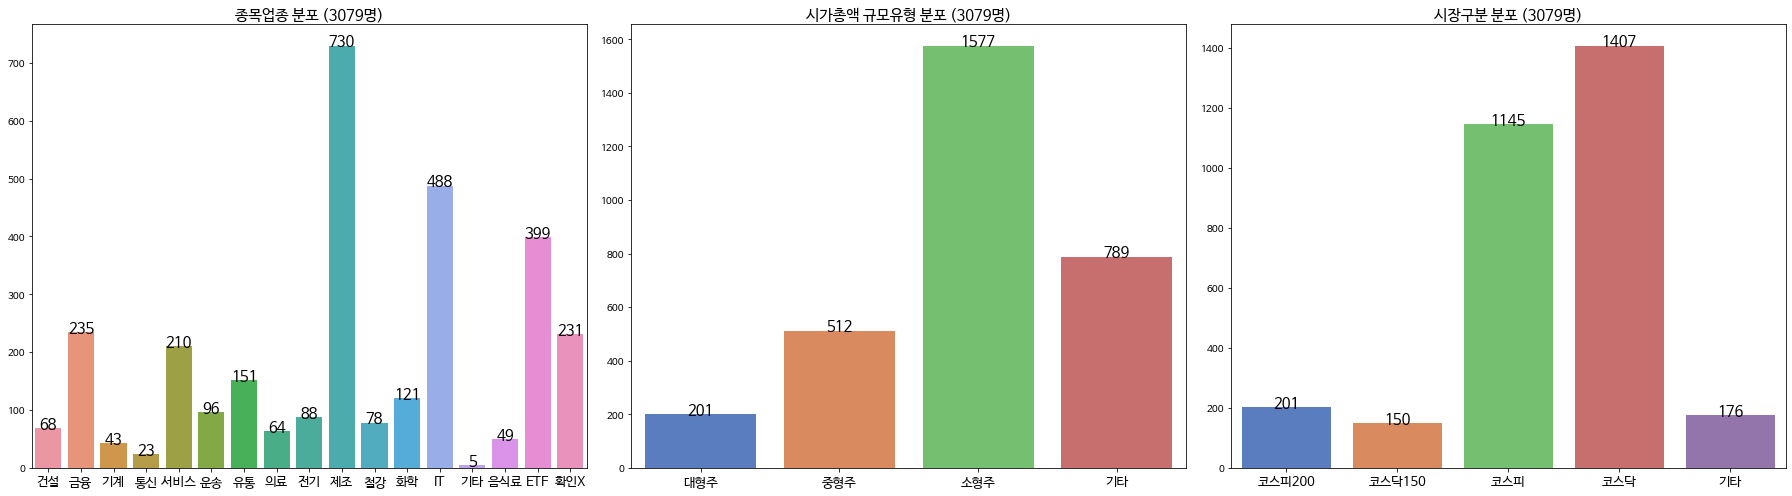

In [260]:
market_type = { 1: "코스피200", 2: "코스닥150", 3: "코스피", 4: "코스닥", 99: "기타" }
column_str['stk_dit_cd'] = market_type

fig, axes = plt.subplots(1, 3, figsize=(25, 7))

columns = stock_info.columns[2:]
col_names = ['종목업종', '시가총액 규모유형', '시장구분']

for i, ax in zip(range(3), axes.flatten()):
  col = columns[i]
  x = sns.countplot(data=stock_info, x=stock_info[col].map(column_str[col]), ax=ax, order=column_str[col].values())

  for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height+0.1, height, ha='center', size=15)
  
  ax.set_xlabel('')
  ax.set_xticklabels(x.get_xticklabels(), fontsize=13)
  ax.set_ylabel('')
  ax.set_title(col_names[i]+' 분포 ('+str(len(stock_info)-np.isnan(stock_info[col]).sum())+'명)', fontsize=15)

fig.tight_layout()
plt.show()